In [1]:
import numpy as np

num_input = 2
num_output=1
num_sample=4

# training sample
X=np.array([0,0,1,1,0,1,0,1]).reshape(num_input,num_sample) # 2x4
Output=np.array([0,1,1,0]).reshape(num_output, num_sample)  # 1x4

print(X)
print(Output)

[[0 0 1 1]
 [0 1 0 1]]
[[0 1 1 0]]


In [2]:
def init_params(num_input=2, num_hidden=2):
  W1=np.random.rand(num_hidden, num_input)
  B1=np.random.rand(num_hidden, 1)
  W2=np.random.rand(num_output, num_hidden)
  B2=np.random.rand(num_output,1)
  return W1, B1, W2, B2

# def init_params(num_input=2, num_hidden=2):
#   W1=np.zeros((num_hidden, num_input))
#   B1=np.zeros((num_hidden, 1))
#   W2=np.zeros((num_output, num_hidden))
#   B2=np.zeros((num_output,1))
#   return W1, B1, W2, B2

W1, B1, W2, B2 = init_params()
print(W1)
print(B1)
print(W2)
print(B2)

[[0.46562022 0.23605336]
 [0.2126264  0.41822964]]
[[0.84218361]
 [0.58100178]]
[[0.06976415 0.35156549]]
[[0.54485545]]


In [3]:
def wxpb(W,X,B):  
  return np.dot(W, X) + B   # w*x+b

def sigmoid (x):
  return 1./(1+np.exp(-1*x))

Z1 = wxpb(W1,X,B1)
Y = sigmoid(Z1)
print(Y)

[[0.69892491 0.7461602  0.78714543 0.82402475]
 [0.64129788 0.73090744 0.68860984 0.77062751]]


In [4]:
Z2=wxpb(W2,Y,B2)
O = sigmoid(Z2)
print(O)

[[0.69403965 0.70137886 0.69885711 0.70542543]]


In [5]:
def loss_func(O, Output):
  return 1./num_sample*np.sum(-1*(Output*np.log(O)+(1-Output)*np.log(1-O)))

loss = loss_func(O, Output)
print(loss)

0.7798847250951306


In [16]:
def forward(W1, B1, W2, B2):
  # forward input layer
  Z1=wxpb(W1,X,B1)
  Y=sigmoid(Z1)
  # forward hidden layer
  Z2=wxpb(W2,Y,B2)
  O=sigmoid(Z2)

  loss=loss_func(O,Output)
  return Z1, Y, Z2, O, loss

def backprop(W1, B1, W2, B2, Z1, Y, Z2, O, Output):
  # backprop hidden layer
  dZ2 = np.multiply((O-Output),1)
  dW2=np.dot(dZ2,Y.T)
  dB2=1./4.*np.sum(dZ2, axis=1, keepdims=True)
  dY=np.dot(W2.T, dZ2)
  # backprop input layer
  dZ1=np.multiply(dY, Y*(1-Y))  #sigmoid의 derivative Y(1-Y)
  dW1=np.dot(dZ1,X.T)
  dB1=1./4.*np.sum(dZ1, axis=1, keepdims=True)

  return dW1, dB1, dW2, dB2

def train(W1, B1, W2, B2, Ir=0.1, iteration=1000):

  loss_trace=[]
  tmp=0

  for iter in range(iteration):

    Z1, Y, Z2, O, loss = forward(W1, B1, W2, B2)
    dW1, dB1, dW2, dB2 = backprop(W1, B1, W2, B2, Z1, Y, Z2, O, Output)

    W1 = W1 -Ir*dW1
    B1 = B1 -Ir*dB1
    W2 = W2 -Ir*dW2
    B2 = B2 -Ir*dB2

    loss_trace.append(loss)
    if loss<0.02 and tmp==0:
      tmp=iter

  return W1, B1, W2, B2, loss_trace, loss, O, tmp


In [17]:
W1, B1, W2, B2 = init_params()
W1, B1, W2, B2, loss_trace, loss, O, tmp = train(W1, B1, W2, B2, 0.1, 4000)

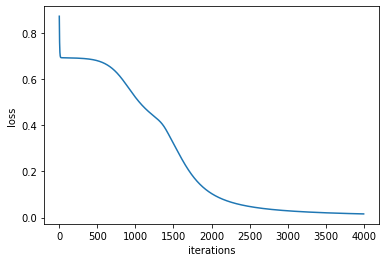

0.01603641195986532
[[0.02667922 0.98855926 0.98852102 0.01395375]]


In [18]:
import matplotlib.pyplot as plt

plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()
print(loss)
print(O)